In [22]:
import numpy as np
import torch
import torch.nn as nn
import copy
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats("svg")

C:\Users\Admin\AppData\Local\Temp\ipykernel_9232\2985840468.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


In [23]:
# create a model
net = nn.Sequential(
    nn.Linear(2, 8), # input layer
    nn.Linear(8, 1), # hidden layer
    nn.Linear(1, 1) # output unit
)

In [24]:
# no random seed

# create a "template" network
net_noseed = copy.deepcopy(net)

# update the weights
for p in net_noseed.named_parameters():
    if "weight" in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [25]:
# random seed 1a

# create a "template" network
net_rs1a = copy.deepcopy(net)

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1a.named_parameters():
    if "weight" in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [26]:
# random seed 2

# create a "template" network
net_rs2 = copy.deepcopy(net)

# set the seed to 2
torch.manual_seed(2)

# update the weights
for p in net_rs2.named_parameters():
    if "weight" in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [27]:
# random seed 1b

# create a "template" network
net_rs1b = copy.deepcopy(net)

# set the seed to 1
torch.manual_seed(1)

# update the weights
for p in net_rs1b.named_parameters():
    if "weight" in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [28]:
# initialize empty arrays
w_ns = np.array([])
w_1a = np.array([])
w_2  = np.array([])
w_1b = np.array([])

# loop over layers in the models
for i in range(3):

  # extract the vectorized weights matrices
  w_ns = np.append(w_ns,net_noseed[i].weight.view(-1).detach().numpy())
  w_1a = np.append(w_1a,  net_rs1a[i].weight.view(-1).detach().numpy())
  w_2  = np.append(w_2 ,   net_rs2[i].weight.view(-1).detach().numpy())
  w_1b = np.append(w_1b,  net_rs1b[i].weight.view(-1).detach().numpy())

# check the vector
w_ns

array([ 0.00462545,  0.4399282 ,  0.39322874, -0.64863259, -0.52780843,
        0.18334524,  0.18266469,  0.11532091, -0.43928766,  0.59318143,
        0.38224319, -0.12545414,  0.31305689, -0.65147078,  0.71953773,
        0.04193521, -0.24074629,  0.30307645, -0.18947838,  1.1997596 ,
        0.00376317,  0.59964669,  0.44793981,  0.08903494, -0.75253475])

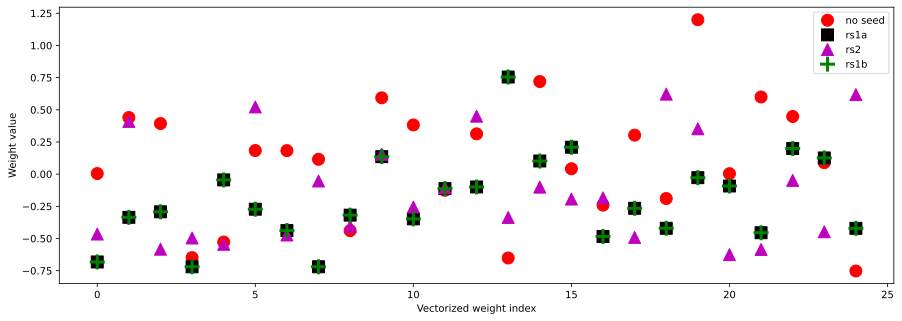

In [29]:
fig = plt.figure(figsize=(15,5))

plt.plot(w_ns,'ro',markersize=12,label='no seed')
plt.plot(w_1a,'ks',markersize=12,label='rs1a')
plt.plot(w_2 ,'m^',markersize=12,label='rs2')
plt.plot(w_1b,'g+',markersize=15,label='rs1b',markeredgewidth=3)
plt.legend()
plt.xlabel('Vectorized weight index')
plt.ylabel('Weight value')

plt.show()

In [30]:
# the algebraic test
print('1a-1b should be zeros:')
print(w_1a-w_1b)
print('\n\n')

print('1a-2 should be non-zeros:')
print(w_1a-w_2)
print('\n\n')

print('1a-ns should be non-zeros:')
print(w_1a-w_ns)
print('\n\n')

1a-1b should be zeros:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]



1a-2 should be non-zeros:
[-0.21680683 -0.74543169  0.29078251 -0.22352022  0.50025801 -0.79460078
  0.03471264 -0.66646316  0.08751756 -0.01855947 -0.09211725 -0.0073103
 -0.55001713  1.09119886  0.20277754  0.40263602 -0.29967313  0.22609788
 -1.04223195 -0.37989978  0.53314489  0.12994796  0.2475912   0.57373706
 -1.03930008]



1a-ns should be non-zeros:
[-0.6868927  -0.77544206 -0.68569788 -0.0711509   0.4830123  -0.45578282
 -0.62083218 -0.83493065  0.1208069  -0.45735283 -0.72986871  0.01299994
 -0.41245927  1.40597081 -0.61738289  0.16719775 -0.24367303 -0.56850207
 -0.23115139 -1.227219   -0.09592727 -1.05485183 -0.24881132  0.0369795
  0.3313396 ]



